In [1]:
# imports
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

x_train = train_images.reshape(60000, 784).T
x_test = test_images.reshape(10000, 784).T

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

# change labels of {numbers < 5 --> 0} & {numbers >= 5 --> 1}
# make y_train
y_train = np.zeros((1, 60000))
for i in range(x_train.shape[1]):
  if train_labels[i] >= 5:
    y_train[0, i] = 1
  else:
    y_train[0, i] = 0

# make y_test
y_test = np.zeros((1, 10000))
for i in range(x_test.shape[1]):
  if test_labels[i] >= 5:
    y_test[0, i] = 1
  else:
    y_test[0, i] = 0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# sigmoid-function
# y = sigmoid(z) #
def sigmoid(z):
  res = 1/(1 + np.exp(-z))
  return res


# derivation_sigmoid = sigmoid(z) * (1 - sigmoid(z))
def derivation_sigmoid(Z):
  res = Z * (1-Z)
  return res


def calculate_loss(predict_yhat, actual_y):
  m = actual_y.shape[1]
  loss = (-1./m)*np.sum(np.multiply(np.log(predict_yhat), actual_y) + np.multiply((1 - actual_y), np.log(1 - predict_yhat)))
  return loss

In [4]:
def initialize_parameters(X, Y, hidden_size): # hidden_size : number of neurons in hidden layer
  input_size = X.shape[0] # number of neurons in input layer
  output_size = Y.shape[0] # number of neurons in output layer
  W1 = np.random.randn(hidden_size, input_size)*np.sqrt(2/input_size) # to make initial weights more random
  b1 = np.zeros((hidden_size, 1))
  W2 = np.random.randn(output_size, hidden_size)*np.sqrt(2/hidden_size) # to make initial weights more random
  b2 = np.zeros((output_size, 1))
  return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}


def forward_propagation(X, params):
  Z1 = np.dot(params['W1'], X)+params['b1']
  A1 = sigmoid(Z1)
  Z2 = np.dot(params['W2'], A1)+params['b2']
  A2 = sigmoid(Z2)
  return A2, {'Z1': Z1, 'Z2': Z2, 'A1': A1, 'y': A2}


def back_propagation(X, Y, params, cache): # paramas : W1, b1, W2, b2    # cache : Z1, A1, Z2, A2
  m = X.shape[1]

  dZ2 = cache['y'] - Y  # dy = A2 - y_train
  dW2 = (1 / m) * np.dot(dZ2, np.transpose(cache['A1']))
  db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

  dZ1 = np.dot(np.transpose(params['W2']), dZ2) * (derivation_sigmoid(sigmoid(cache['Z1'])))
  dW1 = (1 / m) * np.dot(dZ1, np.transpose(X))
  db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
  return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}


def update_parameters(gradients, params, learning_rate):
    W1 = params['W1'] - learning_rate * gradients['dW1']
    b1 = params['b1'] - learning_rate * gradients['db1']
    W2 = params['W2'] - learning_rate * gradients['dW2']
    b2 = params['b2'] - learning_rate * gradients['db2']
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}


def train(X, Y, hidden_size, learning_rate = 1.1, epochs = 2000):
  params = initialize_parameters(X, Y, hidden_size)
  loss_arr = []
  for i in range(epochs):
    y, cache = forward_propagation(X, params)
    loss = calculate_loss(y, Y)
    gradients = back_propagation(X, Y, params, cache)
    params = update_parameters(gradients, params, learning_rate)
    loss_arr.append(loss)
    
    print("epoch: ", i, "   loss: " ,loss)
  return params, loss_arr

epoch:  0    loss:  0.710023531110578
epoch:  1    loss:  0.6975699481941848
epoch:  2    loss:  0.6917906538492545
epoch:  3    loss:  0.6872837321064991
epoch:  4    loss:  0.68310998218471
epoch:  5    loss:  0.6790838206170475
epoch:  6    loss:  0.6751630103691869
epoch:  7    loss:  0.6713328710781871
epoch:  8    loss:  0.667584646731126
epoch:  9    loss:  0.6639113722453406
epoch:  10    loss:  0.6603070206373427
epoch:  11    loss:  0.6567662912116315
epoch:  12    loss:  0.6532845141905731
epoch:  13    loss:  0.6498575873427438
epoch:  14    loss:  0.6464819206114079
epoch:  15    loss:  0.6431543872727014
epoch:  16    loss:  0.6398722791363718
epoch:  17    loss:  0.6366332657113417
epoch:  18    loss:  0.6334353566036128
epoch:  19    loss:  0.630276866888979
epoch:  20    loss:  0.6271563850949943
epoch:  21    loss:  0.6240727435587275
epoch:  22    loss:  0.621024990936628
epoch:  23    loss:  0.6180123666957249
epoch:  24    loss:  0.6150342774394573
epoch:  25    lo

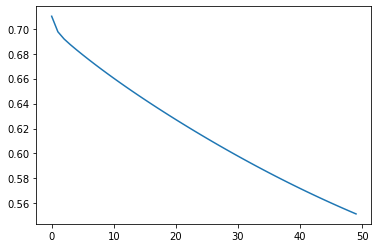

In [5]:
# train the model
params, loss_arr = train(x_train, y_train, 100, 0.2, 50)

plt.plot(loss_arr)

In [6]:
# test the model

def predict(x_test, params):
  y_predict, cache = forward_propagation(x_test, params)

  for i in range(y_predict.shape[1]):
    if y_predict[0, i] >= 0.5:
      y_predict[0, i] = 1
    else:
      y_predict[0, i] = 0

  return y_predict


def calculate_accuracy(y_test, y_predict):
  acc = 0
  for i in range(y_test.shape[1]):
    if y_test[0, i] == y_predict[0, i]:
      acc += 1
  return (float(acc)/y_test.shape[1])*100


y_predict = predict(x_test, params)
accuracy = calculate_accuracy(y_test, y_predict)
print("accuracy = ", accuracy, "%")

accuracy =  76.85 %
